### Importación de datos



In [81]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [82]:
suma_precio_tienda = tienda['Precio'].sum()
suma_precio_tienda2 = tienda2['Precio'].sum()
suma_precio_tienda3 = tienda3['Precio'].sum()
suma_precio_tienda4 = tienda4['Precio'].sum()
print(f"Los ingresos totales de la tienda 1 son: ${suma_precio_tienda:,.0f}")
print(f"Los ingresos totales de la tienda 2 son: ${suma_precio_tienda2:,.0f}")
print(f"Los ingresos totales de la tienda 3 son: ${suma_precio_tienda3:,.0f}")
print(f"Los ingresos totales de la tienda 4 son: ${suma_precio_tienda4:,.0f}")

Los ingresos totales de la tienda 1 son: $1,150,880,400
Los ingresos totales de la tienda 2 son: $1,116,343,500
Los ingresos totales de la tienda 3 son: $1,098,019,600
Los ingresos totales de la tienda 4 son: $1,038,375,700


# 2. Ventas por categoría

In [83]:
list_of_dfs = {'tienda 1': tienda, 'tienda 2': tienda2, 'tienda 3': tienda3, 'tienda 4': tienda4}
cat_counts = {}
for name, df in list_of_dfs.items():
    cat_counts[name] = df['Categoría del Producto'].value_counts()

In [84]:
for name, counts in cat_counts.items():
    print(f"\nCantidad de productos vendidos por categoría {name}:")
    print(counts)


Cantidad de productos vendidos por categoría tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Cantidad de productos vendidos por categoría tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Cantidad de productos vendidos por categoría tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     17

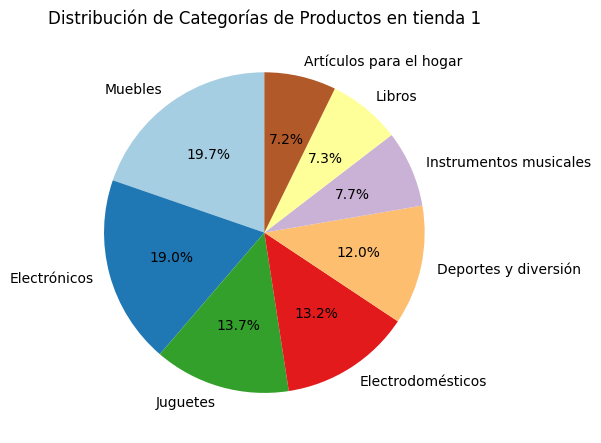

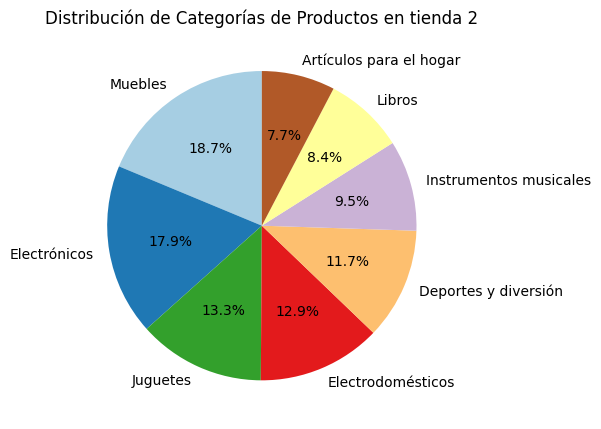

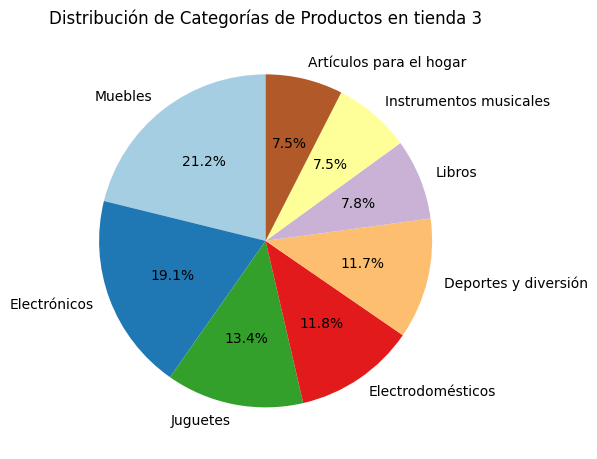

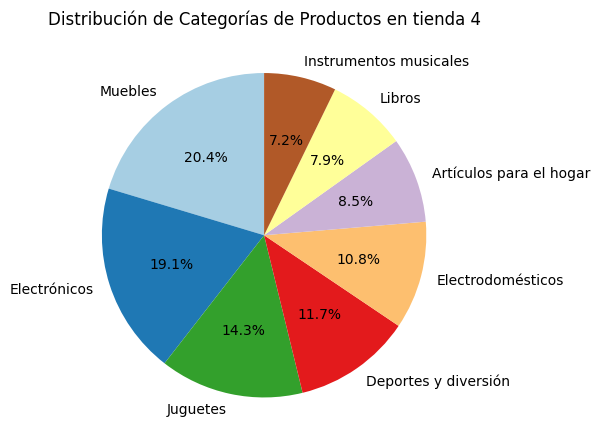

In [85]:
import matplotlib.pyplot as plt

list_of_dfs = {'tienda 1': tienda, 'tienda 2': tienda2, 'tienda 3': tienda3, 'tienda 4': tienda4}
cat_counts = {}
for name, df in list_of_dfs.items():
    cat_counts[name] = df['Categoría del Producto'].value_counts()

for name, counts in cat_counts.items():
    plt.figure(figsize=(6, 8))
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Paired')
    plt.title(f'Distribución de Categorías de Productos en {name}')
    plt.ylabel('') # Ocultar la etiqueta del eje Y para gráficos de pastel
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [86]:
prom_tienda = {}
for name, df in list_of_dfs.items():
    prom_tienda[name] = df['Calificación'].mean()

In [87]:
for name, avg_rating in prom_tienda.items():
    print(f"\nCalificación promedio para {name}:")
    print(f"{avg_rating:.2f}")


Calificación promedio para tienda 1:
3.98

Calificación promedio para tienda 2:
4.04

Calificación promedio para tienda 3:
4.05

Calificación promedio para tienda 4:
4.00


# 4. Productos más y menos vendidos

In [88]:
prod_tienda = {}
for name, df in list_of_dfs.items():
    prod_tienda[name] = df['Producto'].value_counts()

In [89]:
for name, counts in prod_tienda.items():
    print(f"\nCantidad de productos vendidos por producto {name}:")
    print(counts)

    print(f"\n  Producto más vendido en {name}: {most_sold_product} ({most_sold_count} unidades)")
    print(f"  Producto menos vendido en {name}: {least_sold_product} ({least_sold_count} unidades)")


Cantidad de productos vendidos por producto tienda 1:
Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV          

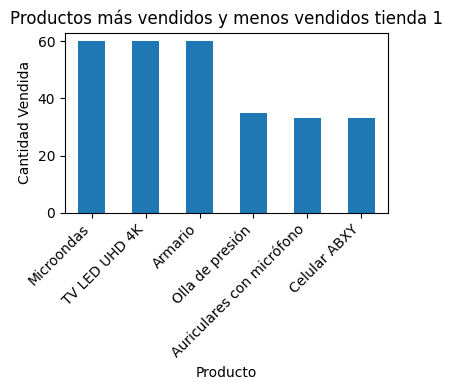

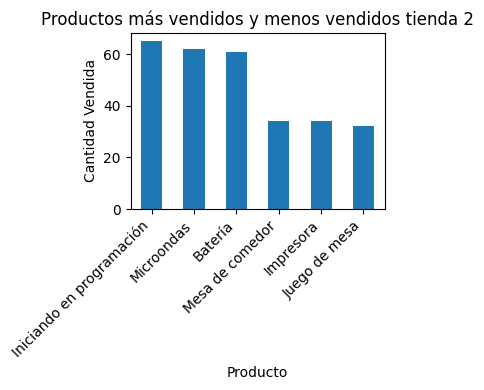

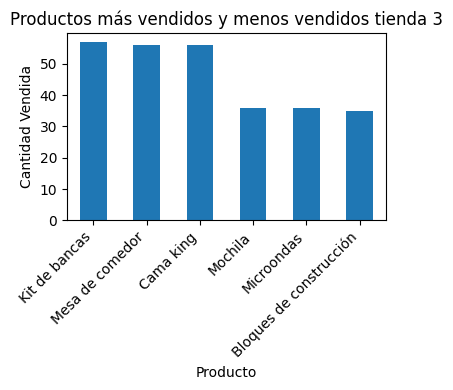

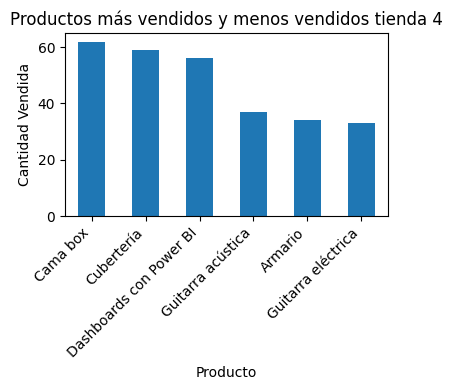

In [90]:
import matplotlib.pyplot as plt

for name, counts in prod_tienda.items():
    top_3_most_sold = counts.head(3)
    top_3_least_sold = counts.tail(3)

    combined_products = pd.concat([top_3_most_sold, top_3_least_sold])

    plt.figure(figsize=(4, 4))
    combined_products.plot(kind='bar')
    plt.title(f'Productos más vendidos y menos vendidos {name}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()


# 5. Envío promedio por tienda

In [91]:
prom_costo_tienda = {}
for name, df in list_of_dfs.items():
    prom_costo_tienda[name] = df['Costo de envío'].mean()

In [92]:
for name, avg_rating in prom_costo_tienda.items():
    print(f"\nValor del envío promedio para {name}:")
    print(f"${avg_rating:.3f}")


Valor del envío promedio para tienda 1:
$26018.610

Valor del envío promedio para tienda 2:
$25216.236

Valor del envío promedio para tienda 3:
$24805.680

Valor del envío promedio para tienda 4:
$23459.457


# **visualización**

---



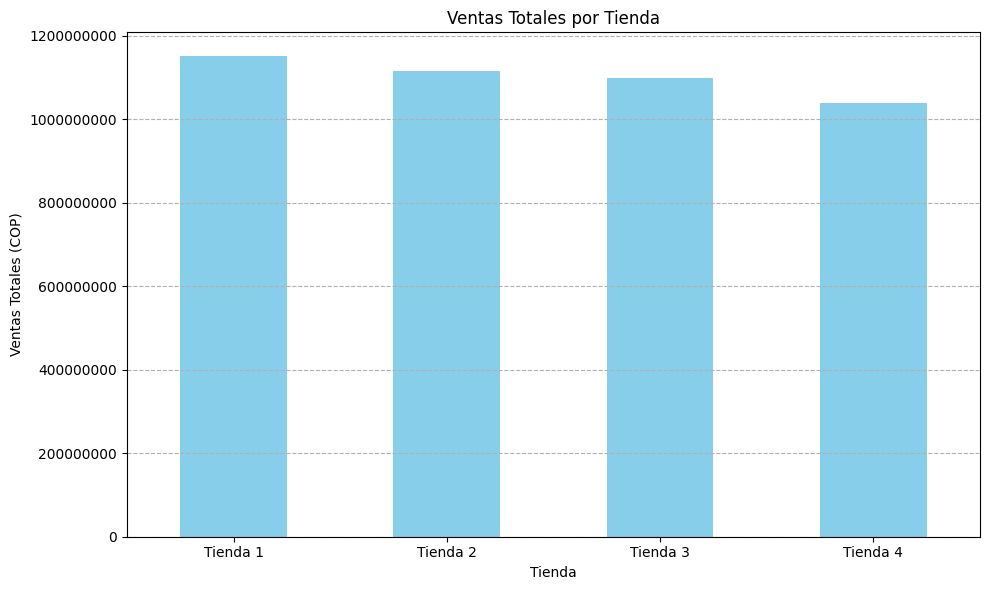

In [93]:

import matplotlib.pyplot as plt

ventas_totales = {
    'Tienda 1': suma_precio_tienda,
    'Tienda 2': suma_precio_tienda2,
    'Tienda 3': suma_precio_tienda3,
    'Tienda 4': suma_precio_tienda4
}

ventas_df = pd.Series(ventas_totales)

plt.figure(figsize=(10, 6))
ventas_df.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales (COP)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


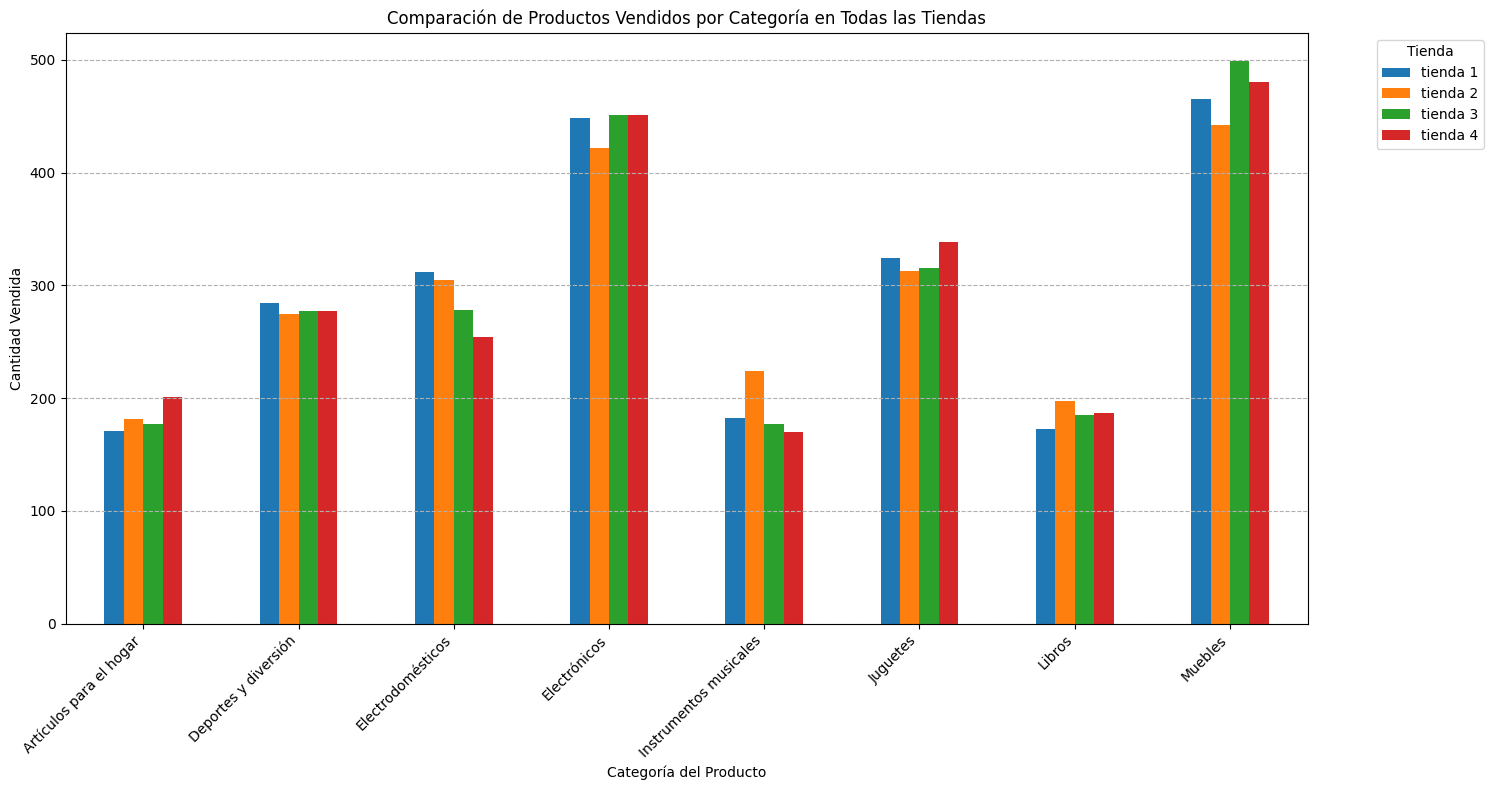

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

list_of_dfs = {'tienda 1': tienda, 'tienda 2': tienda2, 'tienda 3': tienda3, 'tienda 4': tienda4}
cat_counts = {}
for name, df in list_of_dfs.items():
    cat_counts[name] = df['Categoría del Producto'].value_counts()

# Convert the dictionary of Series to a DataFrame
df_cat_counts = pd.DataFrame(cat_counts).fillna(0)

# Plotting the grouped bar chart
ax = df_cat_counts.plot(kind='bar', figsize=(15, 8))
plt.title('Comparación de Productos Vendidos por Categoría en Todas las Tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adjust legend position for better readability
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Esto sugiere que las tiendas tienen una estructura de demanda de productos bastante homogénea o que siguen estrategias de inventario y venta similares. No hay una tienda que destaque claramente como especialista en una categoría particular, ni una que esté muy rezagada en una categoría que sea fuerte para las otras.

La utilidad de la tienda Tienda 1 es: 1089502500.0
La utilidad de la tienda Tienda 2 es: 1056858400.0
La utilidad de la tienda Tienda 3 es: 1039503000.0
La utilidad de la tienda Tienda 4 es: 983058300.0


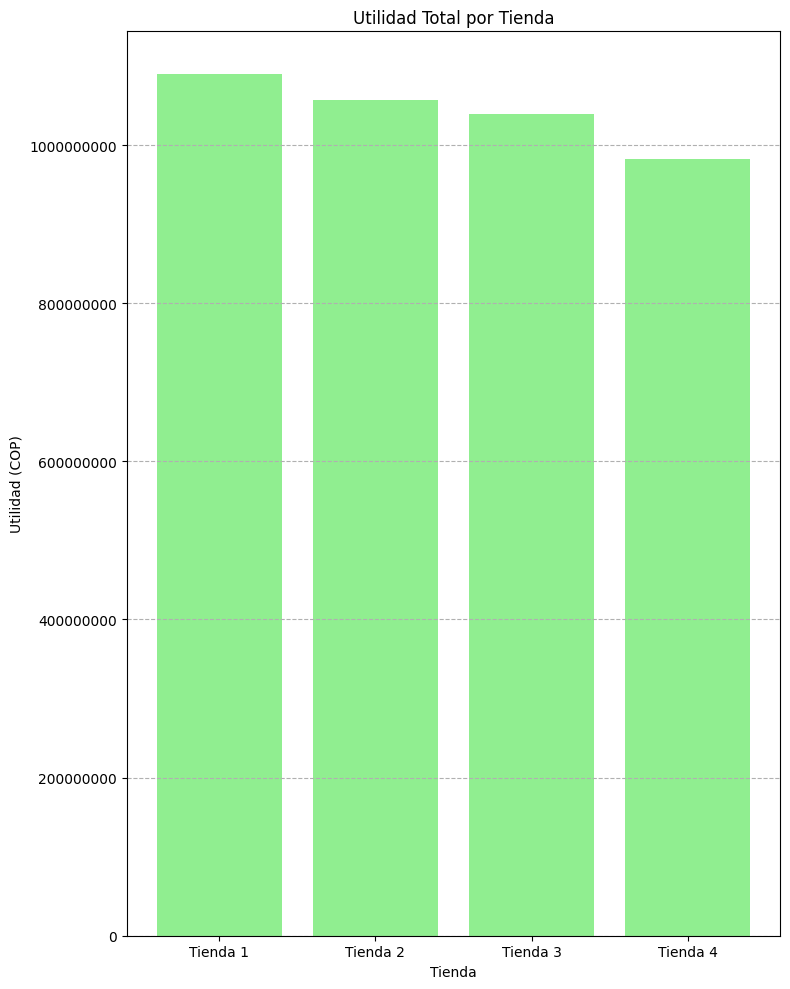

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

total_envio_tienda1 = tienda['Costo de envío'].sum()
total_envio_tienda2 = tienda2['Costo de envío'].sum()
total_envio_tienda3 = tienda3['Costo de envío'].sum()
total_envio_tienda4 = tienda4['Costo de envío'].sum()

utilidad1=suma_precio_tienda-total_envio_tienda1
utilidad2=suma_precio_tienda2-total_envio_tienda2
utilidad3=suma_precio_tienda3-total_envio_tienda3
utilidad4=suma_precio_tienda4-total_envio_tienda4

print(f'La utilidad de la tienda Tienda 1 es: {utilidad1}')
print(f'La utilidad de la tienda Tienda 2 es: {utilidad2}')
print(f'La utilidad de la tienda Tienda 3 es: {utilidad3}')
print(f'La utilidad de la tienda Tienda 4 es: {utilidad4}')

# Creando un DataFrame para la utilidad
utility_data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Utilidad': [utilidad1, utilidad2, utilidad3, utilidad4]
}
df_utility = pd.DataFrame(utility_data)

# Gráfica de barras de utilidad de todas las tiendas
plt.figure(figsize=(8, 10))
plt.bar(df_utility['Tienda'], df_utility['Utilidad'], color='lightgreen')
plt.title('Utilidad Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Utilidad (COP)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La gráfica de barras de 'Utilidad Total por Tienda' indica la rentabilidad bruta de cada establecimiento, considerando la diferencia entre los ingresos totales generados por las ventas y el costo total de envío incurrido. Es una métrica directa de cuánto dinero 'retiene' cada tienda después de cubrir sus gastos de envío.

# **INFORME** **FINAL**

---



Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.


## Informe Final de Desempeño de Tiendas

### Introducción
Este informe presenta un análisis detallado del desempeño de las cuatro tiendas, resumiendo los indicadores clave de rendimiento para cada una. El objetivo es proporcionar a Mr. Juan una base sólida para tomar decisiones estratégicas, particularmente con respecto a la posible venta de una de sus tiendas.

### Análisis por Tienda

### Tienda 1
*   **Facturación Total:** COP 1,150,880,400
*   **Categoría de Producto Más Vendida:** 'Muebles' con 465 unidades.
*   **Categoría de Producto Menos Vendida:** 'Artículos para el hogar' con 171 unidades.
*   **Producto Más Vendido:** 'Microondas' con 60 unidades.
*   **Producto Menos Vendido:** 'Celular ABXY' con 33 unidades.
*   **Calificación Promedio:** 3.98
*   **Costo de Envío Promedio:** COP 26,018.61

### Tienda 2
*   **Facturación Total:** COP 1,116,343,500
*   **Categoría de Producto Más Vendida:** 'Muebles' con 442 unidades.
*   **Categoría de Producto Menos Vendida:** 'Artículos para el hogar' con 181 unidades.
*   **Producto Más Vendido:** 'Iniciando en programación' con 65 unidades.
*   **Producto Menos Vendido:** 'Juego de mesa' con 32 unidades.
*   **Calificación Promedio:** 4.04
*   **Costo de Envío Promedio:** COP 25,216.24

### Tienda 3
*   **Facturación Total:** COP 1,098,019,600
*   **Categoría de Producto Más Vendida:** 'Muebles' con 499 unidades.
*   **Categoría de Producto Menos Vendida:** 'Artículos para el hogar' con 177 unidades.
*   **Producto Más Vendido:** 'Kit de bancas' con 57 unidades.
*   **Producto Menos Vendido:** 'Bloques de construcción' con 35 unidades.
*   **Calificación Promedio:** 4.05
*   **Costo de Envío Promedio:** COP 24,805.68

### Tienda 4
*   **Facturación Total:** COP 1,038,375,700
*   **Categoría de Producto Más Vendida:** 'Muebles' con 480 unidades.
*   **Categoría de Producto Menos Vendida:** 'Guitarra eléctrica' con 33 unidades.
*   **Producto Más Vendido:** 'Cama box' con 62 unidades.
*   **Producto Menos Vendido:** 'Guitarra eléctrica' con 33 unidades.
*   **Calificación Promedio:** 4.00
*   **Costo de Envío Promedio:** COP 23,459.46




**Conclusión Final:**
Mi recomendación es eliminar la Tienda 4 porque es la unidad con el desempeño más bajo.
Aunque demuestra eficiencia en costos de envío y su calificación promedio no es la peor de todas las tiendas, no compensa la utilidad generada a la empresa debido a que su facturación. La Tienda 4 registra la menor facturación total (COP 1,038,375,700).